<a href="https://colab.research.google.com/github/YousefIbrahem/yousef_ibrahem/blob/master/magic2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler


dataset


In [ ]:
cols=["fLength","fWidth","fSize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df= pd.read_csv("magic04.data" , names=cols)
df.head()


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [ ]:
df["class"].unique()

array(['g', 'h'], dtype=object)

In [ ]:
df["class"]=(df["class"]=="g").astype(int)

In [ ]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


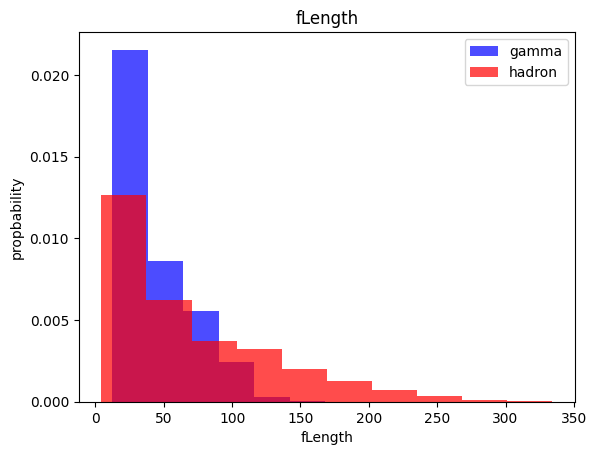

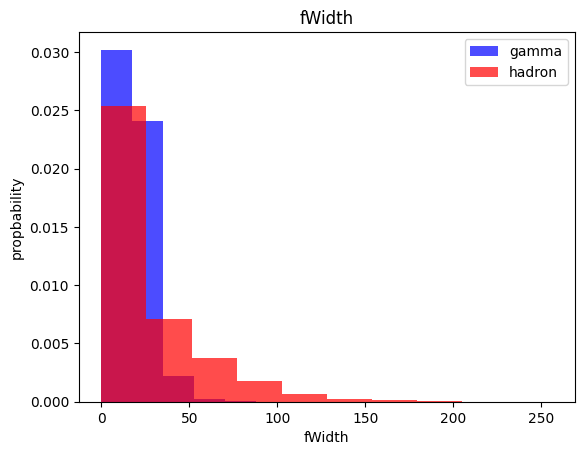

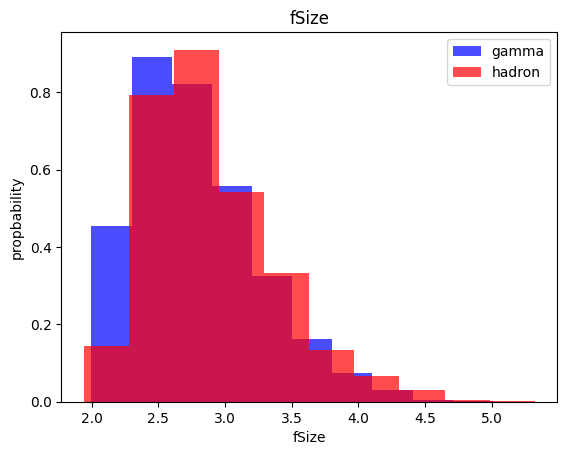

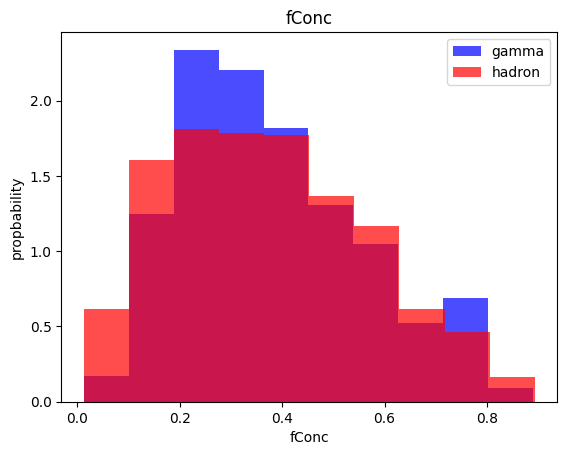

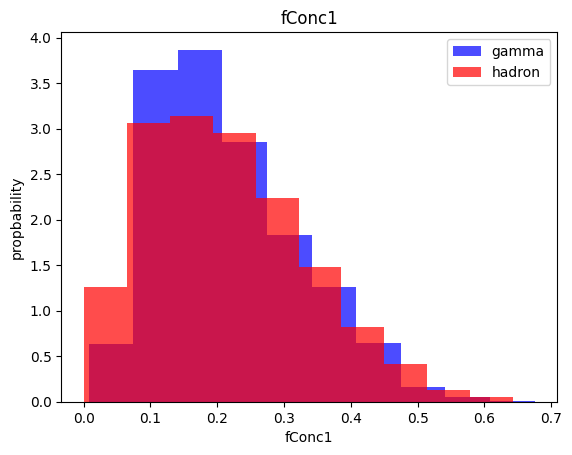

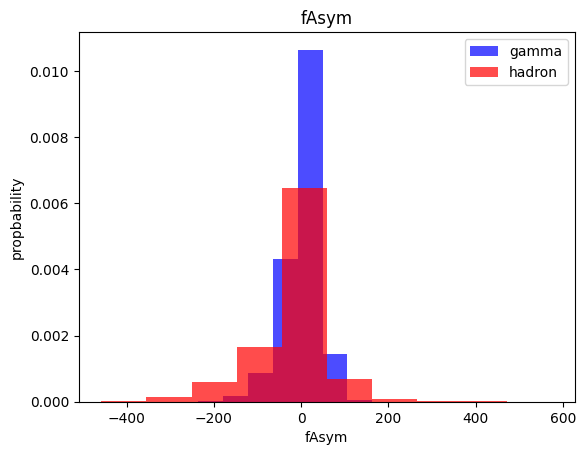

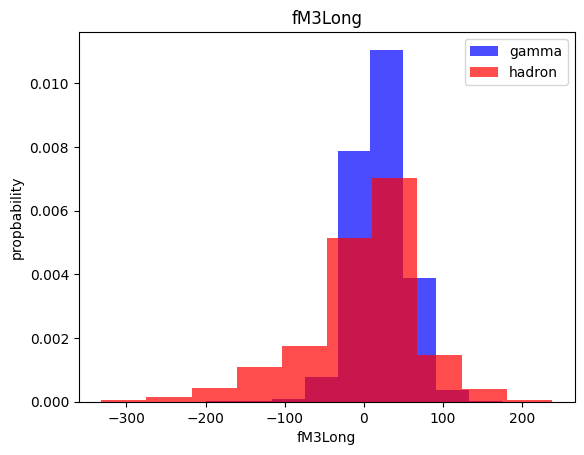

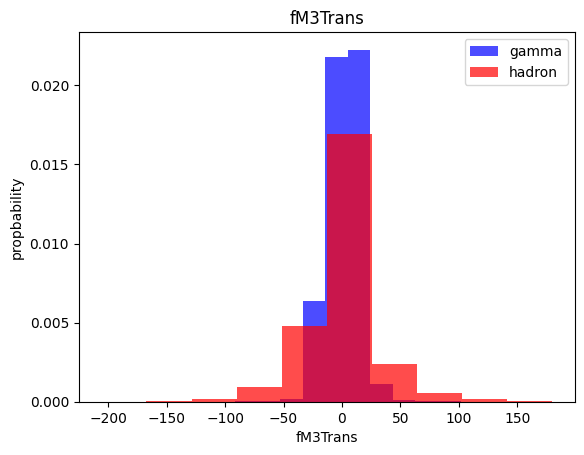

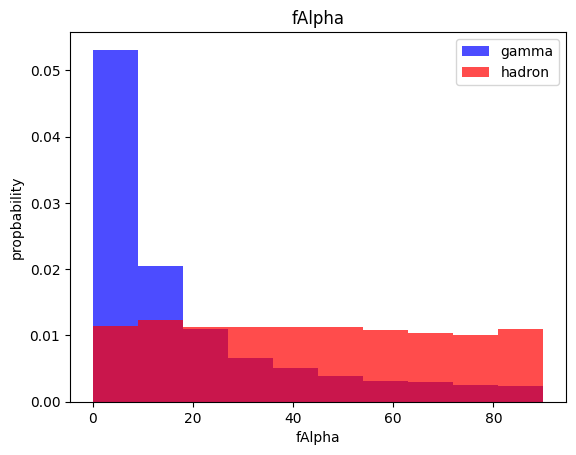

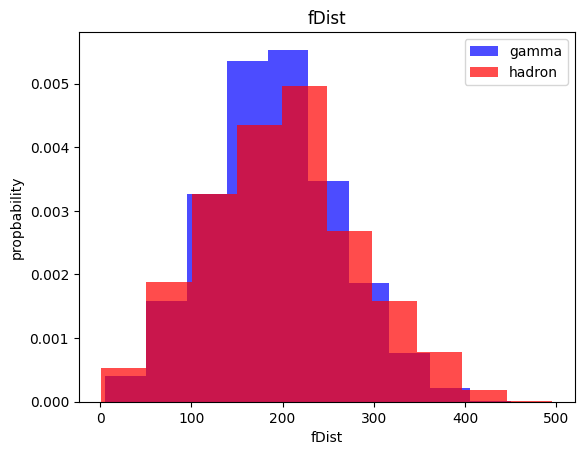

In [ ]:
for label in cols[:-1]:
  plt.hist(df[df["class"]==1][label], color='blue' , label='gamma' , alpha=0.7 , density = True )
  plt.hist(df[df["class"]==0][label], color='red' , label='hadron' , alpha=0.7 , density = True )
  plt.title(label)
  plt.ylabel("propbability")
  plt.xlabel(label)
  plt.legend()
  plt.show()


#Train , VAlidation , Test dataset

In [ ]:
train, valid , test = np.split(df.sample(frac=1) , [int(0.6*len(df)) , int(0.8*len(df))] )

/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:57: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
def scale_dataset (dataframe , oversample=False):
  x=dataframe[dataframe.columns[:-1]].values
  y=dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  x=scaler.fit_transform(x)
  if oversample:
    ros = RandomOverSampler()
    x , y = ros.fit_resample(x,y)

  data=np.hstack ((x, np.reshape(y, (-1 , 1))))
  return data , x, y

In [ ]:
train , x_train , y_train = scale_dataset(train, oversample=True)
valid , x_valid , y_valid = scale_dataset(valid, oversample=False)
test , x_test , y_test = scale_dataset(test, oversample=False)


#KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit (x_train , y_train)

KNeighborsClassifier(n_neighbors=1)

In [ ]:
y_pred = knn_model.predict(x_test)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 1])

In [ ]:
y_test

array([0, 1, 1, ..., 1, 0, 0])

In [ ]:
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.76      0.66      0.70      1366
           1       0.82      0.88      0.85      2438

    accuracy                           0.80      3804
   macro avg       0.79      0.77      0.78      3804
weighted avg       0.80      0.80      0.80      3804



#Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
nb_model = GaussianNB()
nb_model = nb_model.fit (x_train , y_train )


In [ ]:
y_pred= nb_model.predict(x_test)
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1366
           1       0.73      0.90      0.80      2438

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lg_model = LogisticRegression()
lg_model = lg_model.fit (x_train , y_train )

In [ ]:
y_pred= lg_model.predict(x_test)
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.69      0.70      0.69      1366
           1       0.83      0.82      0.83      2438

    accuracy                           0.78      3804
   macro avg       0.76      0.76      0.76      3804
weighted avg       0.78      0.78      0.78      3804



#SVM

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm_model = SVC()
svm_model = svm_model.fit (x_train , y_train )

In [ ]:
y_pred= svm_model.predict(x_test)
print (classification_report(y_test , y_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1366
           1       0.88      0.90      0.89      2438

    accuracy                           0.86      3804
   macro avg       0.85      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804

